In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams

rcParams['figure.subplot.wspace'] = 0.8
rcParams['figure.subplot.hspace'] = 0.6
# rcParams['axes.spines.right'] = False
# rcParams['axes.spines.top'] = False
rcParams['font.size'] = 10
rcParams['axes.titlesize'] = 10
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 7
rcParams['ytick.labelsize'] = 7
rcParams['legend.frameon'] = False

rcParams['font.size'] = 14
rcParams['axes.titlesize'] = 14
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12


rcParams['figure.subplot.wspace'] = 0.8
rcParams['figure.subplot.hspace'] = 0.4
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 8
rcParams['axes.titlesize'] = 9
rcParams['axes.labelsize'] = 8
rcParams['xtick.labelsize'] = 7
rcParams['ytick.labelsize'] = 7
rcParams['legend.frameon'] = False

plt.rcParams['svg.fonttype'] = 'none'

In [2]:
filename = '../Complete_errors_stored60_size10_spars0.1_epochs10_eta0.1_ALL.npz'

filename = '../Complete_errors_stored80_size10_spars0.1_epochs10_eta0.1_ALL.npz'
data = np.load(filename)
print(data.keys())

['trad_80_N', 'FL_N', 'FLT_N', 'FI_N', 'FL_SCL', 'FL_SCLT']


In [3]:
def plot_stuff_together(what, label):
    # plt.subplot(1, 2, axisn)
    center = np.median(what, axis=0)
    edges = np.percentile(what, [25, 75], axis=0)
    plt.gca().color_cyle(plt.cm.viridis(np.arange(what.shape[-1])/what.shape[-1]))
    l = plt.plot(center, label=label, linewidth=2.5, cmap=plt.cm.viridis)
    c = l[0].get_color()
    # plt.fill_between(np.arange(len(center)), *edges, alpha=.15, color=c)
    # plt.plot(edges.T, color=c, alpha=.2)
    plt.ylabel('Pixel Error %')
    plt.ylim([0, 1.1])
    plt.legend(loc='lower right')
    # plt.xlim([-1, 2000])

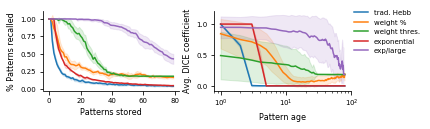

In [211]:
# fig = plt.figure(figsize=(5, 1.25))
fig = plt.figure(figsize=(5, 1.75))

ax = plt.subplot(121)


exp_names = ['trad. Hebb','weight %','weight thres.','F-I','exponential','exp/large']

show_exps = [0,1,2,4,5]

epochs_patterns_presented = 10
colors = plt.cm.tab10.colors #plt.cm.hsv(np.arange(len(show_exps))/len(show_exps))
T = data[data.keys()[0]].shape[1]
show_exps = [0,1,2,4,5]

# for j, k in enumerate(data.keys()[show_exps]):
for j, l in enumerate(show_exps):
    k = data.keys()[l]
#     center = np.median(data[k], axis=0)
#     n = center.shape[-1]
    #plt.plot(np.median(data[k].mean(-1), axis=0))
    x = np.arange(T//epochs_patterns_presented)
    y = np.zeros(T//epochs_patterns_presented)
    dy = np.zeros(T//epochs_patterns_presented)
    for t in range(0,T,epochs_patterns_presented):
        mean_over_p = np.mean(data[k][:,t:t+epochs_patterns_presented,:t//epochs_patterns_presented+1],axis = 2)
        mean_over_trials = np.mean(mean_over_p,axis = 0)
        
#         x = np.arange(t,t+epochs_patterns_presented)
#         y = mean_over_trials #/(x//epochs_patterns_presented+1)
#         plt.plot(x,y, color=colors[j])

#         x = t//epochs_patterns_presented
#         y = mean_over_trials #/(x//epochs_patterns_presented+1)
#         if t==0:
# #             plt.plot(x+1,np.max(y)*100, '.',color=colors[j], label=exp_names[show_exps[j]])
#             plt.plot(x+1,y[-1]*100, '.',color=colors[j], label=exp_names[show_exps[j]])
#         else:
# #             plt.plot(x+1,np.max(y)*100, '.',color=colors[j])
#             plt.plot(x+1,y[-1]*100, '.',color=colors[j])
# #         edges = np.percentile(data[k].mean(-1), [25, 75], axis=0)
# #         plt.fill_between(x, *edges, alpha=.15, color=colors[j])

        y[t//epochs_patterns_presented] = mean_over_trials[-1] #/(x//epochs_patterns_presented+1)
        dy[t//epochs_patterns_presented] = np.std(mean_over_p,axis = 0)[-1] #/(x//epochs_patterns_presented+1)

    plt.plot(x,y,label=exp_names[show_exps[j]],color=colors[j])
    edges = np.vstack((y-dy,y+dy))
    plt.fill_between(x, *edges, alpha=.15, color=colors[j])

plt.tight_layout()
plt.ylabel('% Patterns recalled')
plt.xlabel('Patterns stored')
# plt.ylim((0,1.02))
#plt.legend(['FI_N', 'SCL_N', 'trad_80_N', 'FL_N'])
# plt.legend(['trad_80_N', 'FI_N', 'FIH_N'])
# plt.legend(bbox_to_anchor=(0.98, 1.1), fontsize=7)
#plt.legend(['FI_N', 'trad_80_N', 'FL_N'])
# plt.savefig('patterns_recalled.svg',transparent=True,bbox_inches='tight')


ax = plt.subplot(122)
colors = plt.cm.tab10.colors #plt.cm.hsv(np.arange(len(show_exps))/len(show_exps))
show_exps = [0,1,2,4,5]

l=2

n_pat = data[data.keys()[0]].shape[2]

for j, l in enumerate(show_exps):
    k = data.keys()[l]

    patage = np.array([])
    patd = np.array([])
    for t in range(0,T,epochs_patterns_presented):

#         mean_pat_d = np.mean(data[k][:,t:t+epochs_patterns_presented,:t//epochs_patterns_presented+1][:,-1,:],axis=0)
        mean_pat_d = np.median(np.mean(data[k][:,t:t+epochs_patterns_presented,:t//epochs_patterns_presented+1][:,:,:],axis=1),axis=0)
        #     print(mean_pat_d)
    #     plt.scatter(t//epochs_patterns_presented+np.arange(-len(mean_pat_d)+1,1)[::-1], mean_pat_d,c='k', s=2) 
        patage = np.hstack((patage,(t//epochs_patterns_presented+np.arange(-len(mean_pat_d)+1,1)[::-1])))
        patd=  np.hstack((patd,(mean_pat_d)))
    # plt.scatter(patage,patd)
    mean_d = np.zeros(n_pat)
    sd_d = np.zeros(n_pat)
    edges = np.zeros((2,n_pat))
    for i in range(n_pat):
        inds = patage.astype(int)==i
        mean_d[i] = np.mean(patd[inds])
        sd_d[i] = np.std(patd[inds])
#         edges[:,i] = np.percentile(patd[inds],[25,75])
    #     plt.scatter(patage[inds], patd[inds])
    #     plt.scatter(np.arange(1,len(mean_pat_d)+1), mean_pat_d)
    plt.plot(np.arange(n_pat)[1:],mean_d[1:],label=exp_names[show_exps[j]], color=colors[j])
#     plt.errorbar(np.arange(60),mean_d,sd_d)
    edges = np.vstack((mean_d-sd_d,mean_d+sd_d))
    plt.fill_between(np.arange(n_pat)[1:], *edges[:,1:], alpha=.15, color=colors[j])


    
ax.set_xscale('log')
plt.tight_layout()

plt.ylabel('Avg. DICE coefficient')
plt.xlabel('Pattern age')
# plt.ylim((0,1.02))
#plt.legend(['FI_N', 'SCL_N', 'trad_80_N', 'FL_N'])
# plt.legend(['trad_80_N', 'FI_N', 'FIH_N'])
# plt.legend(bbox_to_anchor=(0.98, 1.1), fontsize=7)
# plt.legend( fontsize=7)
plt.legend(bbox_to_anchor=(0.98, 1.1), fontsize=7)

plt.savefig('patterns_recalled_2.svg',transparent=True,bbox_inches='tight')


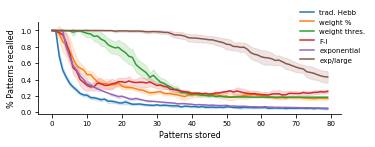

In [5]:
fig = plt.figure(figsize=(4.75, 1.75))

ax = plt.subplot(111)


exp_names = ['trad. Hebb','weight %','weight thres.','F-I','exponential','exp/large']


epochs_patterns_presented = 10
colors = plt.cm.tab10.colors #plt.cm.hsv(np.arange(len(show_exps))/len(show_exps))
T = data[data.keys()[0]].shape[1]
show_exps = [0,1,2,4,5]
show_exps = [0,1,2,3,4,5]

# for j, k in enumerate(data.keys()[show_exps]):
for j, l in enumerate(show_exps):
    k = data.keys()[l]
#     center = np.median(data[k], axis=0)
#     n = center.shape[-1]
    #plt.plot(np.median(data[k].mean(-1), axis=0))
    x = np.arange(T//epochs_patterns_presented)
    y = np.zeros(T//epochs_patterns_presented)
    dy = np.zeros(T//epochs_patterns_presented)
    for t in range(0,T,epochs_patterns_presented):
        mean_over_p = np.mean(data[k][:,t:t+epochs_patterns_presented,:t//epochs_patterns_presented+1],axis = 2)
        mean_over_trials = np.mean(mean_over_p,axis = 0)
        
#         x = np.arange(t,t+epochs_patterns_presented)
#         y = mean_over_trials #/(x//epochs_patterns_presented+1)
#         plt.plot(x,y, color=colors[j])

#         x = t//epochs_patterns_presented
#         y = mean_over_trials #/(x//epochs_patterns_presented+1)
#         if t==0:
# #             plt.plot(x+1,np.max(y)*100, '.',color=colors[j], label=exp_names[show_exps[j]])
#             plt.plot(x+1,y[-1]*100, '.',color=colors[j], label=exp_names[show_exps[j]])
#         else:
# #             plt.plot(x+1,np.max(y)*100, '.',color=colors[j])
#             plt.plot(x+1,y[-1]*100, '.',color=colors[j])
# #         edges = np.percentile(data[k].mean(-1), [25, 75], axis=0)
# #         plt.fill_between(x, *edges, alpha=.15, color=colors[j])

        y[t//epochs_patterns_presented] = mean_over_trials[-1] #/(x//epochs_patterns_presented+1)
        dy[t//epochs_patterns_presented] = np.std(mean_over_p,axis = 0)[-1] #/(x//epochs_patterns_presented+1)

    plt.plot(x,y,label=exp_names[show_exps[j]],color=colors[j])
    edges = np.vstack((y-dy,y+dy))
    plt.fill_between(x, *edges, alpha=.15, color=colors[j])

plt.tight_layout()
plt.ylabel('% Patterns recalled')
plt.xlabel('Patterns stored')
# plt.ylim((0,1.02))
#plt.legend(['FI_N', 'SCL_N', 'trad_80_N', 'FL_N'])
# plt.legend(['trad_80_N', 'FI_N', 'FIH_N'])
# plt.legend(bbox_to_anchor=(0.98, 1.1), fontsize=7)
#plt.legend(['FI_N', 'trad_80_N', 'FL_N'])
# plt.savefig('patterns_recalled.svg',transparent=True,bbox_inches='tight')
plt.legend(fontsize=7,bbox_to_anchor=(1.1, 1.2))#1.1))

plt.savefig('patterns_recalled_3.svg',transparent=True,bbox_inches='tight')


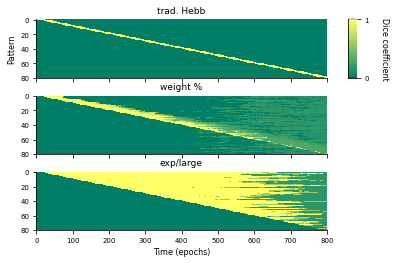

In [229]:
from mpl_toolkits.axes_grid1 import ImageGrid

# Set up figure and image grid
# fig = plt.figure(figsize=(5, len(data.keys())*1.25))
# fig = plt.figure(figsize=(6.5, len(data.keys())*1.25))
fig = plt.figure(figsize=(5.75, len(data.keys())*1.25))

show_exps = range(len(data.keys()))
show_exps = [0,1,5]
ax = ImageGrid(fig, 111,
                 nrows_ncols=(len(show_exps), 1),
                 axes_pad=0.25,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="each",
                 cbar_size="3%",
                 cbar_pad=0.3,
                 )



for i,j in enumerate(show_exps):
    k = data.keys()[j]
    ax[i].set_title(exp_names[j])
    center = np.median(data[k], axis=0)
    n,m = center.shape
    # blank out lower triangle:
#     inds = [[(x,y) for x in range(n) if x<n/m*y] for y in range(m)]
#     for i in inds:
#         for j in i:
#             center[j]=0
    im = ax[i].imshow(center.T,cmap=plt.cm.summer,aspect=0.2*n/m,vmin=0,vmax=1)
    ax[i].cax.set_visible(False)

ax[0].set_ylabel('Pattern')    
ax[-1].set_xlabel('Time (epochs)')
ax[0].cax.set_visible(True)
ax[0].cax.colorbar(im)
ax[0].cax.toggle_label(True)
ax[0].cax.set_yticks((0,1))
ax[0].cax.set_ylabel('Dice coefficient', rotation=270,labelpad=20)

plt.savefig('2d_plots.svg',transparent=True,bbox_inches='tight')


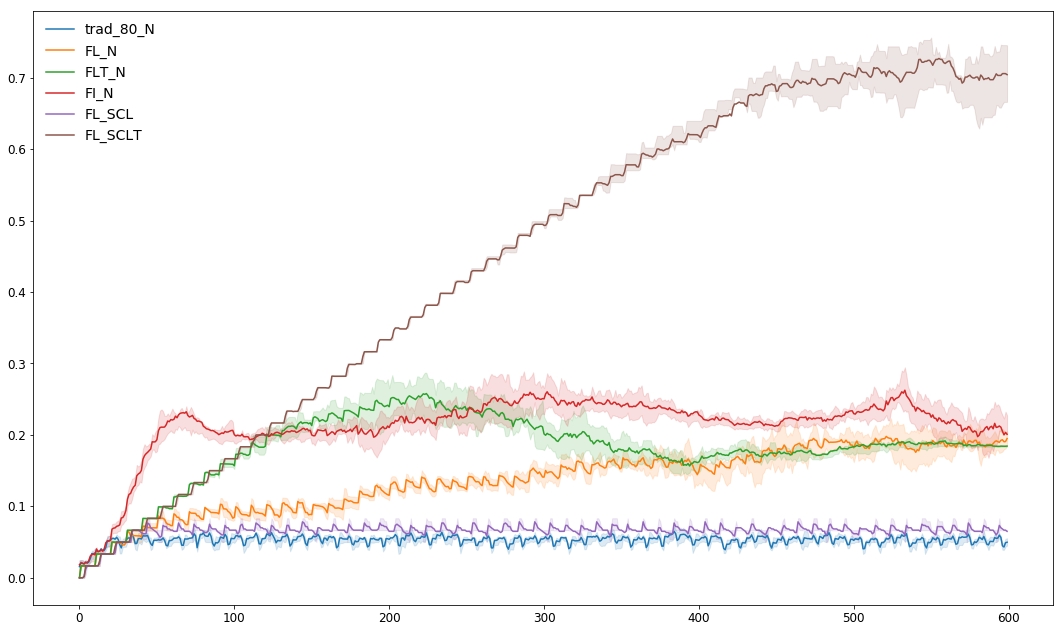

In [143]:
epochs_patterns_presented = 10
plt.figure(figsize=(15, len(data.keys())*1.5))
colors = plt.cm.tab10.colors #plt.cm.hsv(np.arange(len(show_exps))/len(show_exps))
T = data[data.keys()[0]].shape[1]
for j, k in enumerate(data.keys()):
#     center = np.median(data[k], axis=0)
#     n = center.shape[-1]
    #plt.plot(np.median(data[k].mean(-1), axis=0))
    mean_over_p = np.mean(data[k],axis = 2)
    mean_over_trials = np.mean(mean_over_p,axis = 0)
    x = np.arange(len(mean_over_trials))
    y = mean_over_trials #/(x//epochs_patterns_presented+1)
    plt.plot(x,y, color=colors[j])
    edges = np.percentile(data[k].mean(-1), [25, 75], axis=0)
    plt.fill_between(x, *edges, alpha=.15, color=colors[j])

plt.tight_layout()
# plt.ylim((0,1.02))
#plt.legend(['FI_N', 'SCL_N', 'trad_80_N', 'FL_N'])
# plt.legend(['trad_80_N', 'FI_N', 'FIH_N'])
plt.legend(data.keys())
#plt.legend(['FI_N', 'trad_80_N', 'FL_N'])

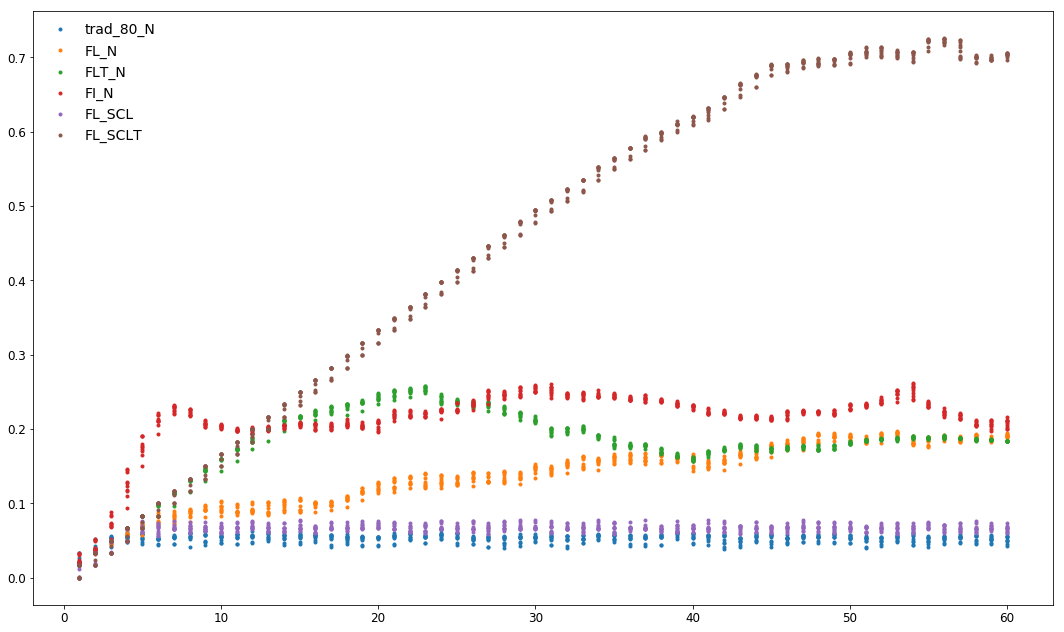

In [142]:
epochs_patterns_presented = 10
plt.figure(figsize=(15, len(data.keys())*1.5))
colors = plt.cm.tab10.colors #plt.cm.hsv(np.arange(len(show_exps))/len(show_exps))
for j, k in enumerate(data.keys()):
    center = np.median(data[k], axis=0)
    n = center.shape[-1]
    #plt.plot(np.median(data[k].mean(-1), axis=0))
    mean_over_p = np.mean(data[k],axis = 2)
    mean_over_trials = np.mean(mean_over_p,axis = 0)
    x = np.arange(len(mean_over_trials))//epochs_patterns_presented+1#
    y = mean_over_trials #/(x//epochs_patterns_presented+1)
    plt.plot(x,y, '.',color=colors[j])
    #edges = np.percentile(data[k].mean(-1), [25, 75], axis=0)
    #plt.fill_between(x, *edges, alpha=.15, color=colors[j])

plt.tight_layout()
# plt.ylim((0,1.02))
#plt.legend(['FI_N', 'SCL_N', 'trad_80_N', 'FL_N'])
# plt.legend(['trad_80_N', 'FI_N', 'FIH_N'])
plt.legend(data.keys())
#plt.legend(['FI_N', 'trad_80_N', 'FL_N'])

In [127]:
x//epochs_patterns_presented

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

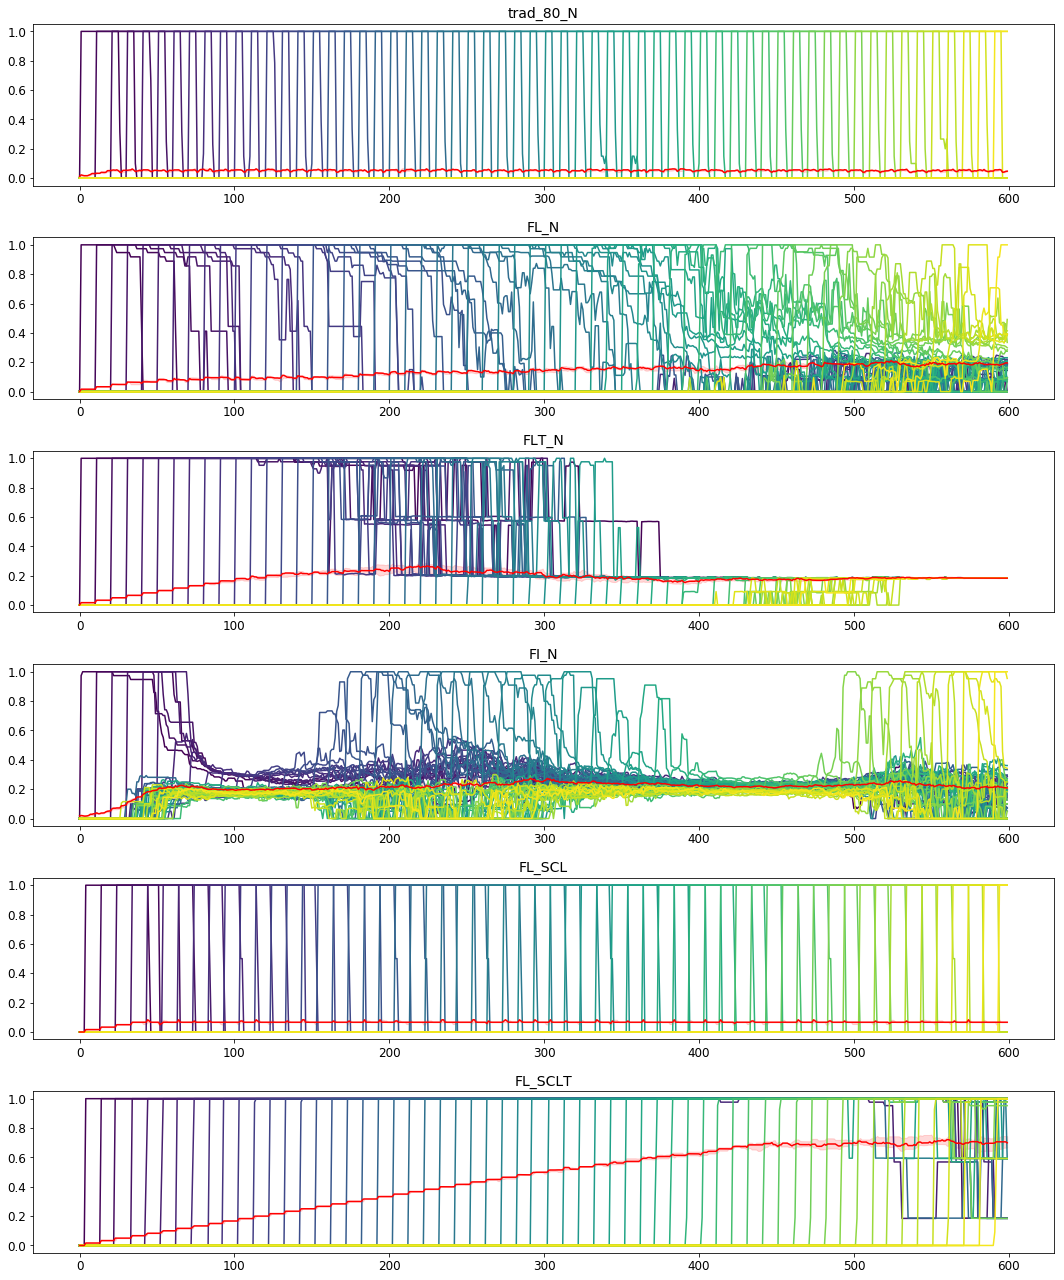

In [111]:
plt.figure(figsize=(15, len(data.keys())*3))
for j, k in enumerate(data.keys()):
    plt.subplot(len(data.keys()), 1, j+1)
    plt.title(k)
    center = np.median(data[k], axis=0)
    n = center.shape[-1]
    for i, p in enumerate(center.T):
        plt.plot(p, c=plt.cm.viridis(i/n))
    plt.plot(np.median(data[k].mean(-1), axis=0), c='r')
    edges = np.percentile(data[k].mean(-1), [25, 75], axis=0)
    plt.fill_between(np.arange(len(center)), *edges, alpha=.15, color='r')
plt.tight_layout()

Text(0,0.5,'Dice coefficient')

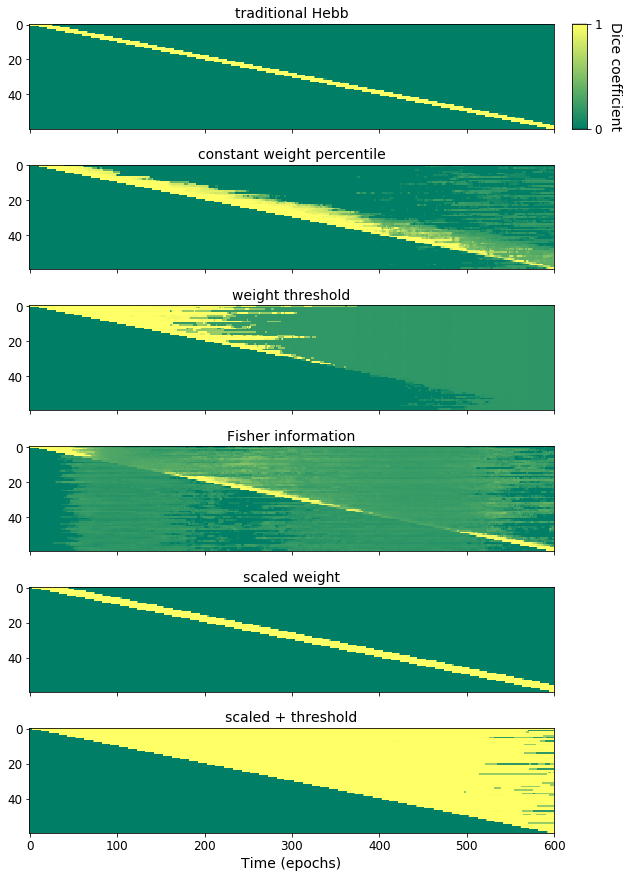

In [112]:
from mpl_toolkits.axes_grid1 import ImageGrid

# Set up figure and image grid
fig = plt.figure(figsize=(10, len(data.keys())*2.5))

exp_names = ['traditional Hebb','constant weight percentile','weight threshold','Fisher information','scaled weight','scaled + threshold']
show_exps = range(len(data.keys()))
show_exps = [0,1,2,3,4,5]
ax = ImageGrid(fig, 111,
                 nrows_ncols=(len(show_exps), 1),
                 axes_pad=0.5,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="each",
                 cbar_size="3%",
                 cbar_pad=0.25,
                 )



for i,j in enumerate(show_exps):
    k = data.keys()[j]
    ax[i].set_title(exp_names[j])
    center = np.median(data[k], axis=0)
    n,m = center.shape
    # blank out lower triangle:
#     inds = [[(x,y) for x in range(n) if x<n/m*y] for y in range(m)]
#     for i in inds:
#         for j in i:
#             center[j]=0
    im = ax[i].imshow(center.T,cmap=plt.cm.summer,aspect=0.2*n/m,vmin=0,vmax=1)
    ax[i].cax.set_visible(False)

    
ax[-1].set_xlabel('Time (epochs)')
ax[0].cax.set_visible(True)
ax[0].cax.colorbar(im)
ax[0].cax.toggle_label(True)
ax[0].cax.set_yticks((0,1))
ax[0].cax.set_ylabel('Dice coefficient', rotation=270,labelpad=20)
